# System pkgs

In [1]:
import sys
import os
import IPython

# Data Wrangling pkgs

In [2]:
import numpy as np
np.set_printoptions(threshold=sys.maxsize) # to display the entire array
import pandas as pd
import glob
import urllib.request
import requests
from bs4 import BeautifulSoup

# Data Visualisation pkgs

In [3]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
# plt.rcParams['figure.figsize'] = [12, 8]
# plt.rcParams['figure.dpi'] = 300 # e.g. default 100 but 300 would be a really fine plot, but slower
import seaborn as sns
import plotly
# from PIL import Image # default but in case
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
# from bokeh.plotting import figure, show
# from bokeh.io import output_notebook
# from IPython.display import Image
# output_notebook()

# Geospatial pkgs

In [4]:
import rioxarray as rioxr
import xarray as xr
import geopandas as gpd
import rasterio as rio
import folium
# from wktplot import WKTPlot
# from wktplot.plots.osm import OpenStreetMapsPlot #### Import OpenStreetMaps plotting class with bokeh
import fiona
import shapely
from shapely.geometry import shape, box, LineString, MultiPolygon, Polygon, MultiPoint, Point, LinearRing
from shapely import wkt
import contextily as ctx

## DOCKER IMAGE IS FAILING
# from osgeo import osr
# import gdal

# Scientific pkgs

In [5]:
import re
import random
import scipy
from tqdm import tqdm # or from tqdm.notebook import tqdm # FOR FANCY GREEN BAR
import colormap
from datetime import datetime

# DB pkgs

In [6]:
import psycopg2
import sqlalchemy

# ML pkgs

In [7]:
import sklearn as skl
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, random_split, DataLoader
from torch.autograd import Variable
from torch.nn import Linear, ReLU, CrossEntropyLoss, Sequential, Conv2d, MaxPool2d, Module, Softmax, BatchNorm2d, Dropout
import torchvision
from torchvision.transforms import Compose, ToTensor, RandomCrop, RandomRotation, RandomVerticalFlip, RandomHorizontalFlip, Normalize, Resize, ColorJitter
from torch.optim import Adam, SGD

# import keras

# NLP pkgs

In [8]:
import nltk
import spacy

# SPARQL

In [9]:
from SPARQLWrapper import SPARQLWrapper, JSON, XML, RDF

# Version Checking

In [10]:
from platform import python_version
print(f"Python \t\t v{python_version()}")
print(f"numpy \t\t v{np.__version__}")
print(f"pandas \t\t v{pd.__version__}\n")

print(f"geopandas\t v{gpd.__version__}")
print(f"xarray \t\t v{xr.__version__}")
print(f"rioXarray \t v{rioxr.__version__}")
print(f"rasterio \t v{rio.__version__}")
print(f"folium \t\t v{folium.__version__}")
print(f"fiona \t\t v{fiona.__version__}")
print(f"Shapely \t v{shapely.__version__}")
print(f"Shapely GEOS \t v{shapely.geos_version_string}")
print(f"Shapely GEOS-C-API v{shapely.geos_capi_version_string}\n")

print(f"psycopg2 \t v{psycopg2.__version__}")
print(f"SQLAlchemy \t v{sqlalchemy.__version__}\n")

print(f"SciPy \t\t v{scipy.__version__}")
print(f"Scikit-Learn \t v{skl.__version__}")
print(f"NLTK \t\t v{nltk.__version__}")
print(f"SpaCy \t\t v{spacy.__version__}\n")

# Set device
print(f"PyTorch \t v{torch.__version__}")
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
tqdm.write("Use device: {device:}\n".format(device=device))

Python 		 v3.11.11
numpy 		 v2.2.1
pandas 		 v2.2.3

geopandas	 v1.0.1
xarray 		 v2025.1.0
rioXarray 	 v0.18.1
rasterio 	 v1.4.3
folium 		 v0.19.3
fiona 		 v1.10.1
Shapely 	 v2.0.6
Shapely GEOS 	 v3.11.4
Shapely GEOS-C-API v3.11.4-CAPI-1.17.4

psycopg2 	 v2.9.10 (dt dec pq3 ext lo64)
SQLAlchemy 	 v2.0.36

SciPy 		 v1.15.0
Scikit-Learn 	 v1.6.0
NLTK 		 v3.9.1
SpaCy 		 v3.8.3

PyTorch 	 v2.5.0+cu124
Use device: cpu



# Data

## Tensors

In [11]:
x = torch.rand(10, 25)
print(x)
x.shape

tensor([[0.1575, 0.4947, 0.6950, 0.5255, 0.9869, 0.5679, 0.8246, 0.1885, 0.4656,
         0.8250, 0.1504, 0.5534, 0.3404, 0.5897, 0.2971, 0.1599, 0.1447, 0.8573,
         0.2130, 0.5954, 0.0961, 0.3052, 0.7826, 0.6335, 0.3054],
        [0.2318, 0.0914, 0.5306, 0.8124, 0.6829, 0.3702, 0.8281, 0.8103, 0.5823,
         0.5998, 0.0850, 0.3936, 0.6650, 0.6220, 0.9690, 0.3511, 0.2518, 0.2029,
         0.3422, 0.3260, 0.2947, 0.5698, 0.6973, 0.4204, 0.0672],
        [0.6883, 0.8628, 0.6985, 0.5236, 0.2020, 0.0046, 0.7643, 0.5779, 0.2777,
         0.4023, 0.5005, 0.6746, 0.5856, 0.5162, 0.1892, 0.0069, 0.8809, 0.9293,
         0.8872, 0.7961, 0.0797, 0.5181, 0.7212, 0.4606, 0.6594],
        [0.3183, 0.2520, 0.1122, 0.7071, 0.1940, 0.2675, 0.5118, 0.0928, 0.4343,
         0.1536, 0.1385, 0.6962, 0.1348, 0.0770, 0.7196, 0.9240, 0.3687, 0.5362,
         0.2080, 0.7318, 0.9168, 0.7085, 0.1260, 0.0654, 0.3946],
        [0.4613, 0.4403, 0.2850, 0.9084, 0.7946, 0.2746, 0.0356, 0.2619, 0.6069,
       

torch.Size([10, 25])

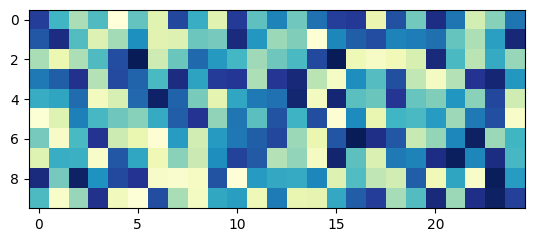

In [12]:
# x = np.random.randn(100, 100).clip(0, 1)
plt.imshow(x)
plt.imshow(x, cmap='YlGnBu_r');

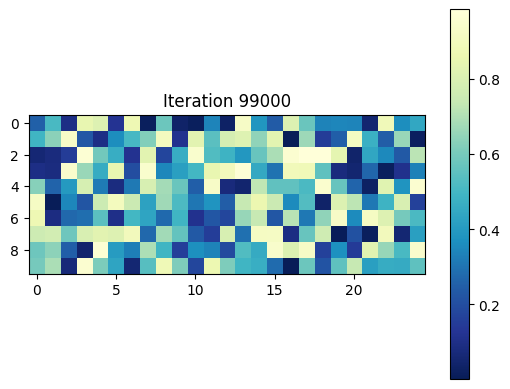

100%|██████████| 100000/100000 [00:10<00:00, 9690.89it/s]


In [16]:
## ANIMATE THE OUTPUT IMAGE AT EACH 1000th LOOP
from IPython.display import clear_output

for i in tqdm(range(100000)):
    x = torch.rand(10, 25)
    
    if i % 1000 == 0: # FOR EVERY 1000th LOOP
        clear_output(wait=True)
        plt.imshow(x, cmap='YlGnBu_r') # icefire_r, nipy_spectral_r
        plt.colorbar()
        plt.title(f'Iteration {i}')
        plt.show()

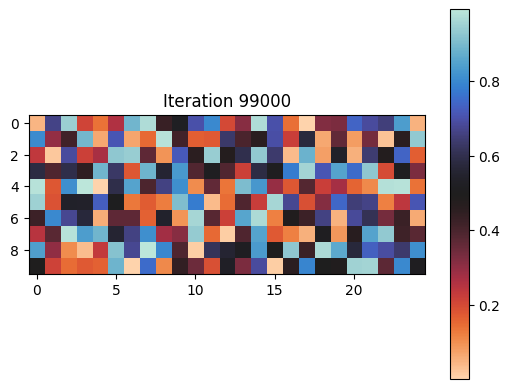

100%|██████████| 100000/100000 [00:10<00:00, 9608.24it/s]


In [19]:
## ANIMATE THE OUTPUT IMAGE AT EACH 1000th LOOP
from IPython.display import clear_output

for i in tqdm(range(100000)):
    x = torch.rand(10, 25)
    
    if i % 1000 == 0: # FOR EVERY 1000th LOOP
        clear_output(wait=True)
        plt.imshow(x, cmap='icefire_r') # icefire_r, nipy_spectral_r
        plt.colorbar()
        plt.title(f'Iteration {i}')
        plt.show()

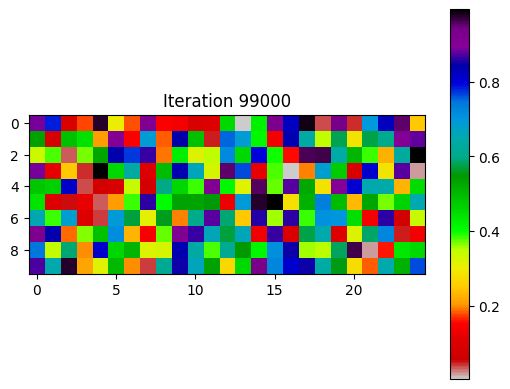

100%|██████████| 100000/100000 [00:10<00:00, 9347.22it/s]


In [25]:
## ANIMATE THE OUTPUT IMAGE AT EACH 1000th LOOP
from IPython.display import clear_output

for i in tqdm(range(100000)):
    x = torch.rand(10, 25)
    
    if i % 1000 == 0: # FOR EVERY 1000th LOOP
        clear_output(wait=True)
        plt.imshow(x, cmap='nipy_spectral_r') # icefire_r, nipy_spectral_r
        plt.colorbar()
        plt.title(f'Iteration {i}')
        plt.show()

In [14]:
batch_size = 10
color_mean = (0.5, 0.5, 0.5)
color_std = (0.5, 0.5, 0.5)
img_size = 224

# Define transforms [randomize images like flipping, cropping, inversing] applied to CIFER
transform = Compose([
    RandomHorizontalFlip(),
    RandomVerticalFlip(),
    ToTensor(),
    Resize((img_size,img_size)),
    Normalize(color_mean, color_std)])

transform

Compose(
    RandomHorizontalFlip(p=0.5)
    RandomVerticalFlip(p=0.5)
    ToTensor()
    Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
    Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
)

### CSV

In [15]:
dfEmp = pd.read_csv('./data/uniData/Employee_Information.csv')
dfEmp

,Employee ID,DOB,DOJ,Department_ID
0,IU196557,1983-02-23T00:00:00Z,2009-10-31T00:00:00Z,IDEPT4938
1,IU449901,1985-09-02T00:00:00Z,2009-06-07T00:00:00Z,IDEPT2357
2,IU206427,1971-07-30T00:00:00Z,2008-05-09T00:00:00Z,IDEPT4670
3,IU688905,1973-07-20T00:00:00Z,2002-01-17T00:00:00Z,IDEPT2601
4,IU634582,1991-11-16T00:00:00Z,2000-02-13T00:00:00Z,IDEPT7626
...,...,...,...,...
995,IU531414,1993-09-18T00:00:00Z,2009-03-24T00:00:00Z,IDEPT4055
996,IU227668,1985-02-20T00:00:00Z,2005-11-08T00:00:00Z,IDEPT8598
997,IU528779,1985-06-13T00:00:00Z,1999-11-06T00:00:00Z,IDEPT3062
998,IU874473,1984-02-06T00:00:00Z,1999-11-15T00:00:00Z,IDEPT7783


## From URLs

In [16]:
r = requests.get('https://www.yelp.com/biz/social-brew-cafe-pyrmont') # from yelp
soup = BeautifulSoup(r.text, 'html.parser')
regex = re.compile('.*comment.*')
results = soup.find_all('p', {'class':regex})
reviews = [result.text for result in results]

In [17]:
reviews[1]

"Six of us met here for breakfast before our walk to Manly. We were enjoying visiting with each other so much that I apologize for not taking any photos. We all enjoyed our food, as well as our coffee and tea drinks.We were greeted immediately by a friendly server asking if we would like to sit inside or out. We said we would like inside, but weren't exactly sure how many were joining us yet- at least 4. We were told this was no problem, the more the merrier. A few minutes later when 4 more joined our party and we explained to the server we had 6, he just quickly switched our table. I really enjoyed my serenity tea, just what I needed after a long flight in from Sfo that morning. Everyone else were more interested in the lattes for expresso drinks. All said they were hot and delicious. 2 of us ordered the avo on toast. So yummy with the beetroot... I will start adding this to mine now at home, and have fond memories for my trip to Sydney. 2 friends ordered the salmon Benedict- saying i

In [18]:
len(reviews) # 10 reviews

10

In [19]:
dfReviews = pd.DataFrame(np.array(reviews), columns=['review'])
dfReviews

,review
0,Very cute coffee shop and restaurant. They hav...
1,Six of us met here for breakfast before our wa...
2,We came for brunch and they ran out of seven s...
3,The food was delicious. The ricotta pancakes w...
4,Great place with delicious food and friendly s...
5,Ricotta hot cakes! These were so yummy. I ate ...
6,Great food amazing coffee and tea. Short walk ...
7,We came for brunch twice in our week-long visi...
8,"Great service, lovely location, and really ama..."
9,It was ok. Had coffee with my friends. I'm new...


In [20]:
dfReviews['review'].iloc[1]

"Six of us met here for breakfast before our walk to Manly. We were enjoying visiting with each other so much that I apologize for not taking any photos. We all enjoyed our food, as well as our coffee and tea drinks.We were greeted immediately by a friendly server asking if we would like to sit inside or out. We said we would like inside, but weren't exactly sure how many were joining us yet- at least 4. We were told this was no problem, the more the merrier. A few minutes later when 4 more joined our party and we explained to the server we had 6, he just quickly switched our table. I really enjoyed my serenity tea, just what I needed after a long flight in from Sfo that morning. Everyone else were more interested in the lattes for expresso drinks. All said they were hot and delicious. 2 of us ordered the avo on toast. So yummy with the beetroot... I will start adding this to mine now at home, and have fond memories for my trip to Sydney. 2 friends ordered the salmon Benedict- saying i

### Shapefile(.shp)

In [21]:
gdfDist25 = gpd.read_file('./data/Munich_25_Bezirke_Dissolved.shp')
gdfSubDist105 = gpd.read_file('./data/Munich_105_Bezirke.shp')

In [22]:
gdfDist25.head()

,Nr,FIRST_Bezi,FIRST_Nr,geometry
0,1,Altstadt-Lehel,1,"POLYGON ((11.5952 48.1417, 11.595 48.1412, 11...."
1,2,Ludwigsvorstadt-Isarvorstadt,2,"POLYGON ((11.556 48.1408, 11.5593 48.1406, 11...."
2,3,Maxvorstadt,3,"POLYGON ((11.5843 48.1442, 11.5831 48.1414, 11..."
3,4,Schwabing-West,4,"POLYGON ((11.5817 48.1763, 11.5832 48.1694, 11..."
4,5,Au-Haidhausen,5,"POLYGON ((11.5956 48.1405, 11.5959 48.1403, 11..."


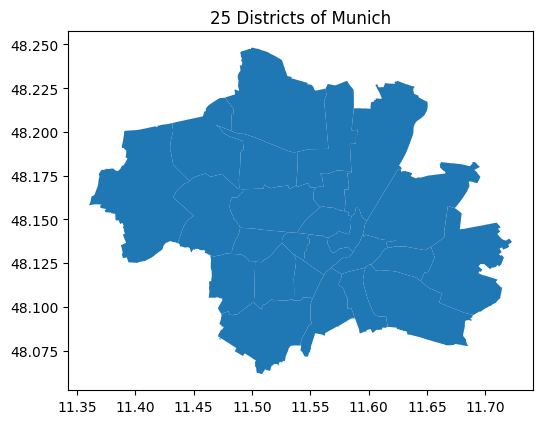

In [23]:
f, ax1 = plt.subplots(figsize=(6, 5))
gdfDist25.plot(ax=ax1)
ax1.set(title="25 Districts of Munich")
plt.show()

Nymphenburg of District Neuhausen-Nymphenburg


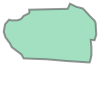

In [24]:
gid = random.randint(0, 24)
print(gdfSubDist105.NAME[gid],'of District', gdfSubDist105.Bezirk[gid])
INPUT = gdfSubDist105.geometry[gid]
INPUT

## Raster Data

### NetCDF (.nc)

In [25]:
### FOR THE FIRST TIME ###

# for yr in range(2011,2015): # note that in python, the end range is not inclusive. So, in this case data for 2015 is not downloaded.
#     url = f'https://downloads.psl.noaa.gov/Datasets/cpc_us_precip/RT/precip.V1.0.{yr}.nc'
#     savename = url.split('/')[-1]
#     urllib.request.urlretrieve(url,savename)

In [26]:
ds2011 = xr.open_dataset('./precip.V1.0.2011.nc')
ds2011

<xarray.Dataset> Size: 53MB
Dimensions:  (lat: 120, lon: 300, time: 365)
Coordinates:
  * lat      (lat) float32 480B 20.12 20.38 20.62 20.88 ... 49.38 49.62 49.88
  * lon      (lon) float32 1kB 230.1 230.4 230.6 230.9 ... 304.4 304.6 304.9
  * time     (time) datetime64[ns] 3kB 2011-01-01 2011-01-02 ... 2011-12-31
Data variables:
    precip   (time, lat, lon) float32 53MB ...
Attributes:
    title:          CPC Unified Gauge-Based Analysis of Daily Precipitation o...
    Conventions:    COARDS
    description:    Gridded daily Precipitation
    platform:       Observations
    Comments:       Preciptation is accumulated from 12z of previous day to 1...
    history:        originally created RT starting 04/2010 by CAS from data o...
    dataset_title:  CPC Unified Gauge-Based Analysis of Daily Precipitation o...
    References:     http://www.psl.noaa.gov/data/gridded/data.unified.daily.c...

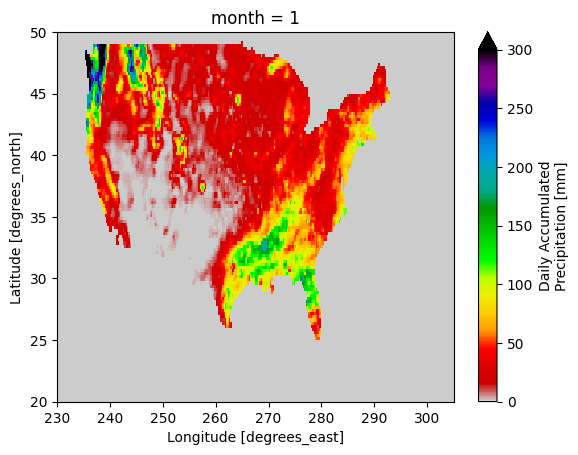

In [27]:
ds2011_mon = ds2011.groupby('time.month').sum()
ds2011_mon.precip[0,:,:].plot(cmap='nipy_spectral_r', vmax=300);

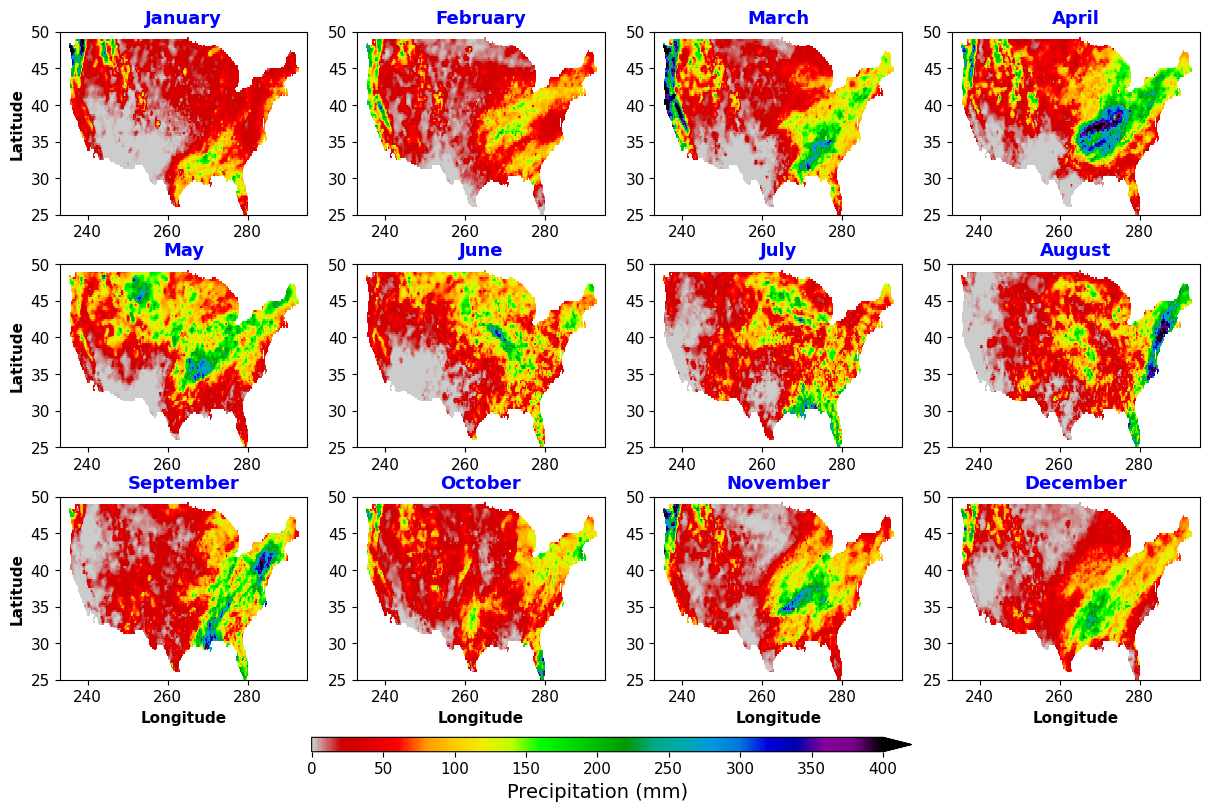

In [28]:
# We'll use this library to easily add month name to subplot titles.
import calendar
# First, We will develop a land mask data array that we can use to mask out the nan values:
landmask = ds2011.precip.sum(dim='time')>0
fig = plt.figure(figsize=[12,8], facecolor='w')
plt.subplots_adjust(bottom=0.15, top=0.96, left=0.04, right=0.99, 
                    wspace=0.2, hspace=0.27) # wspace and hspace adjust the horizontal and vertical spaces, respectively.
nrows = 3
ncols = 4
for i in range(1, 13):
    plt.subplot(nrows, ncols, i)
    dataplot = ds2011_mon.precip[i-1, :, :].where(landmask) # Remember that in Python, the data index starts at 0, but the subplot index start at 1.
    p = plt.pcolormesh(ds2011_mon.lon, ds2011_mon.lat, dataplot,
                   vmax = 400, vmin = 0, cmap = 'nipy_spectral_r',
                   ) #icefire
    plt.xlim([233,295])
    plt.ylim([25,50])
    plt.title(calendar.month_name[dataplot.month.values], fontsize = 13, 
              fontweight = 'bold', color = 'b')
    plt.xticks(fontsize = 11)
    plt.yticks(fontsize = 11)
    if i % ncols == 1: # Add ylabel for the very left subplots
        plt.ylabel('Latitude', fontsize = 11, fontweight = 'bold')
    if i > ncols*(nrows-1): # Add xlabel for the bottom row subplots
        plt.xlabel('Longitude', fontsize = 11, fontweight = 'bold')

# Add a colorbar at the bottom:
cax = fig.add_axes([0.25, 0.06, 0.5, 0.018])
cb = plt.colorbar(cax=cax, orientation='horizontal', extend = 'max',)
cb.ax.tick_params(labelsize=11)
cb.set_label(label='Precipitation (mm)', color = 'k', size=14)

# Now we can save a high resolution (300dpi) version of the figure:
# plt.savefig('Fig_prec_cpc_mon_2012.png', format = 'png', dpi = 300)

### GeoTIFF

### RasDaMan

In [29]:
# # Rasdaman
# from rasdapy.db_connector import DBConnector
# from rasdapy.query_executor import QueryExecutor

# db_connector = DBConnector("localhost", 7001, "rasadmin", "rasadmin")
# query_executor = QueryExecutor(db_connector)
# db_connector.open() # connection open

# if db_connector is not None:
#     print("RasDaMan is running") 
    
# def restart_rasdaman():
#     from rasdapy.db_connector import DBConnector
#     from rasdapy.query_executor import QueryExecutor

#     db_connector = DBConnector("localhost", 7001, "rasadmin", "rasadmin")
#     query_executor = QueryExecutor(db_connector)
#     db_connector.open() # connection open

## Colormap

In [30]:
from matplotlib import colormaps
list(colormaps)

['magma',
 'inferno',
 'plasma',
 'viridis',
 'cividis',
 'twilight',
 'twilight_shifted',
 'turbo',
 'berlin',
 'managua',
 'vanimo',
 'Blues',
 'BrBG',
 'BuGn',
 'BuPu',
 'CMRmap',
 'GnBu',
 'Greens',
 'Greys',
 'OrRd',
 'Oranges',
 'PRGn',
 'PiYG',
 'PuBu',
 'PuBuGn',
 'PuOr',
 'PuRd',
 'Purples',
 'RdBu',
 'RdGy',
 'RdPu',
 'RdYlBu',
 'RdYlGn',
 'Reds',
 'Spectral',
 'Wistia',
 'YlGn',
 'YlGnBu',
 'YlOrBr',
 'YlOrRd',
 'afmhot',
 'autumn',
 'binary',
 'bone',
 'brg',
 'bwr',
 'cool',
 'coolwarm',
 'copper',
 'cubehelix',
 'flag',
 'gist_earth',
 'gist_gray',
 'gist_heat',
 'gist_ncar',
 'gist_rainbow',
 'gist_stern',
 'gist_yarg',
 'gnuplot',
 'gnuplot2',
 'gray',
 'hot',
 'hsv',
 'jet',
 'nipy_spectral',
 'ocean',
 'pink',
 'prism',
 'rainbow',
 'seismic',
 'spring',
 'summer',
 'terrain',
 'winter',
 'Accent',
 'Dark2',
 'Paired',
 'Pastel1',
 'Pastel2',
 'Set1',
 'Set2',
 'Set3',
 'tab10',
 'tab20',
 'tab20b',
 'tab20c',
 'grey',
 'gist_grey',
 'gist_yerg',
 'Grays',
 'magma_r',

In [31]:
# c = colormap.Colormap()
# c.plot_colormap('sequential')

In [32]:
for i in tqdm(range(10000000)):
    ...

print("ALL IS WELL")

100%|██████████| 10000000/10000000 [00:01<00:00, 7340555.75it/s]

ALL IS WELL


In [33]:
from tqdm.notebook import tqdm
for i in tqdm(range(10000000)):
    ...

print("ALL IS WELL")

  0%|          | 0/10000000 [00:00<?, ?it/s]

ALL IS WELL


## WordCloud

In [34]:
text = "A statement of Holmes age in His Last Bow places his year of birth at 1854. the story, set in August 1914, describes him as sixty years of age. His parents are not mentioned, although Holmes mentions that his ancestors were country squires. In The Adventure of the Greek Interpreter, he claims that his grandmother was sister to the French artist Vernet, without clarifying whether this was Claude Joseph, Carle, or Horace Vernet. Holmes brother Mycroft, seven years his senior, is a government official. Mycroft has a unique civil service position as a kind of human database for all aspects of government policy. Sherlock describes his brother as the more intelligent of the two, but notes that Mycroft lacks any interest in physical investigation, preferring to spend his time at the Diogenes Club"
text

'A statement of Holmes age in His Last Bow places his year of birth at 1854. the story, set in August 1914, describes him as sixty years of age. His parents are not mentioned, although Holmes mentions that his ancestors were country squires. In The Adventure of the Greek Interpreter, he claims that his grandmother was sister to the French artist Vernet, without clarifying whether this was Claude Joseph, Carle, or Horace Vernet. Holmes brother Mycroft, seven years his senior, is a government official. Mycroft has a unique civil service position as a kind of human database for all aspects of government policy. Sherlock describes his brother as the more intelligent of the two, but notes that Mycroft lacks any interest in physical investigation, preferring to spend his time at the Diogenes Club'

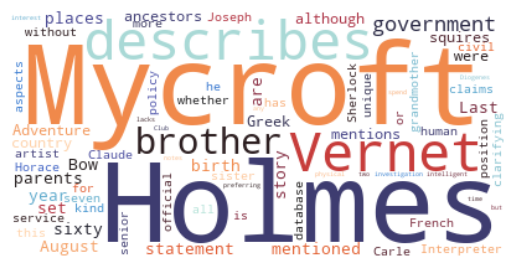

In [35]:
# Create stopword list:
stopwords = ["a", "as","years", "his", "the","was","of", "at", "in", "to", "that", "not","him","age"]
# stopwords.update(["drink", "now", "wine", "flavor", "flavors"])
wordcloud = WordCloud(stopwords=stopwords, max_font_size=90, max_words=100, background_color="white", colormap='icefire').generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## DBPedia SPARQL Endpoint

In [36]:
sparqlEndpoint = SPARQLWrapper("http://dbpedia.org/sparql") # SPARQL endpoint
sparqlEndpoint.setReturnFormat(JSON) #determine the output format

In [37]:
#SPARQL query to be executed
sparqlEndpoint.setQuery("""
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX dbo: <http://dbpedia.org/ontology/>
PREFIX dbp: <http://dbpedia.org/property/>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX dbc: <http://dbpedia.org/resource/Category:>
PREFIX dct: <http://purl.org/dc/terms/>

SELECT DISTINCT ?date ?author ?authorName ?thumbnail ?description
WHERE {
?author rdf:type dbo:Writer ;
              dct:subject dbc:Nobel_laureates_in_Literature ;
        rdfs:label ?authorName ;
        dbo:wikiPageWikiLink ?link ;
        rdfs:comment ?description
 FILTER ((lang(?authorName)="en")&&(lang(?description)="en")) .

?link dct:subject dbc:Nobel_Prize_in_Literature ;
         dbp:holderLabel ?date .
 OPTIONAL { ?author dbo:thumbnail ?thumbnail . }
}

ORDER BY ?date
""")

In [38]:
sparqlEndpoint.setReturnFormat(JSON)   # Return format is JSON
results = sparqlEndpoint.query().convert()   # execute SPARQL query and write result to "results"
results

{'head': {'link': [],
  'vars': ['date', 'author', 'authorName', 'thumbnail', 'description']},
 'results': {'distinct': False,
  'ordered': True,
  'bindings': [{'date': {'type': 'literal',
     'xml:lang': 'en',
     'value': 'Currently held by'},
    'author': {'type': 'uri',
     'value': 'http://dbpedia.org/resource/Camilo_José_Cela'},
    'authorName': {'type': 'literal',
     'xml:lang': 'en',
     'value': 'Camilo José Cela'},
    'thumbnail': {'type': 'uri',
     'value': 'http://commons.wikimedia.org/wiki/Special:FilePath/Camilo_José_Cela._Fototeca._Biblioteca_Virtual_del_Patrimonio_Bibliográfico.jpg?width=300'},
    'description': {'type': 'literal',
     'xml:lang': 'en',
     'value': 'Camilo José Cela y Trulock, 1st Marquess of Iria Flavia (Spanish: [kamilo xoˈse ˈθela]; 11 May 1916 – 17 January 2002) was a Spanish novelist, poet, story writer and essayist associated with the Generation of \'36 movement. He was awarded the 1989 Nobel Prize in Literature "for a rich and int

In [39]:
results_df = pd.json_normalize(results['results']['bindings'])
results_df.head()

,date.type,date.xml:lang,date.value,author.type,author.value,authorName.type,authorName.xml:lang,authorName.value,thumbnail.type,thumbnail.value,description.type,description.xml:lang,description.value
0,literal,en,Currently held by,uri,http://dbpedia.org/resource/Camilo_José_Cela,literal,en,Camilo José Cela,uri,http://commons.wikimedia.org/wiki/Special:File...,literal,en,"Camilo José Cela y Trulock, 1st Marquess of Ir..."
1,literal,en,Currently held by,uri,http://dbpedia.org/resource/Carl_Spitteler,literal,en,Carl Spitteler,uri,http://commons.wikimedia.org/wiki/Special:File...,literal,en,Carl Friedrich Georg Spitteler (24 April 1845 ...
2,literal,en,Currently held by,uri,http://dbpedia.org/resource/Pär_Lagerkvist,literal,en,Pär Lagerkvist,uri,http://commons.wikimedia.org/wiki/Special:File...,literal,en,Pär Fabian Lagerkvist (23 May 1891 – 11 July 1...
3,literal,en,Currently held by,uri,http://dbpedia.org/resource/Roger_Martin_du_Gard,literal,en,Roger Martin du Gard,uri,http://commons.wikimedia.org/wiki/Special:File...,literal,en,Roger Martin du Gard (French: [dy gaʁ]; 23 Mar...
4,literal,en,Currently held by,uri,http://dbpedia.org/resource/Romain_Rolland,literal,en,Romain Rolland,uri,http://commons.wikimedia.org/wiki/Special:File...,literal,en,Romain Rolland (French: [ʁɔlɑ̃]; 29 January 18...


In [40]:
results_df.shape

(102, 13)

In [41]:
results_df[['date.value', 'author.value', 'authorName.value', 'thumbnail.value', 'description.value']].head()

,date.value,author.value,authorName.value,thumbnail.value,description.value
0,Currently held by,http://dbpedia.org/resource/Camilo_José_Cela,Camilo José Cela,http://commons.wikimedia.org/wiki/Special:File...,"Camilo José Cela y Trulock, 1st Marquess of Ir..."
1,Currently held by,http://dbpedia.org/resource/Carl_Spitteler,Carl Spitteler,http://commons.wikimedia.org/wiki/Special:File...,Carl Friedrich Georg Spitteler (24 April 1845 ...
2,Currently held by,http://dbpedia.org/resource/Pär_Lagerkvist,Pär Lagerkvist,http://commons.wikimedia.org/wiki/Special:File...,Pär Fabian Lagerkvist (23 May 1891 – 11 July 1...
3,Currently held by,http://dbpedia.org/resource/Roger_Martin_du_Gard,Roger Martin du Gard,http://commons.wikimedia.org/wiki/Special:File...,Roger Martin du Gard (French: [dy gaʁ]; 23 Mar...
4,Currently held by,http://dbpedia.org/resource/Romain_Rolland,Romain Rolland,http://commons.wikimedia.org/wiki/Special:File...,Romain Rolland (French: [ʁɔlɑ̃]; 29 January 18...


# QR Code

In [42]:
import segno
data = "https://github.com/aghoshpro"
qrcode = segno.make(data, version=7, error='h')

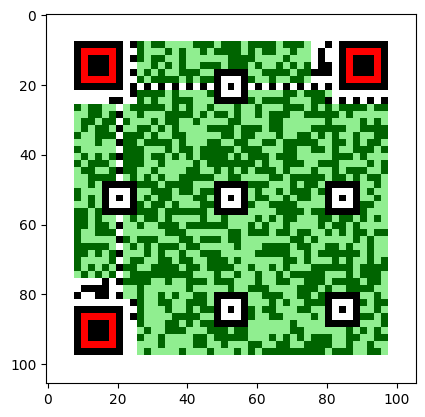

In [43]:
img = qrcode.to_pil(scale=2, dark='black', data_dark='darkgreen', data_light='lightgreen', finder_light='red').rotate(0, expand=True)
plt.imshow(img)
plt.show()

# Exploratory Data Analysis (EDA)

In [43]:
!pip install PythonTurtle

In [47]:
!python3 -m pip show PythonTurtle

Name: PythonTurtle
Version: 0.3.2
Summary: An educational environment for learning Python, suitable for beginners
Home-page: http://pythonturtle.org
Author: Ram Rachum and contributors
Author-email: ram@rachum.com
License: MIT
Location: /home/myenv/lib/python3.11/site-packages
Requires: 
Required-by: 


In [55]:
!python3 -m pip show shapely plotly

Name: shapely
Version: 2.0.6
Summary: Manipulation and analysis of geometric objects
Home-page: 
Author: Sean Gillies
Author-email: 
License: BSD 3-Clause
Location: /home/myenv/lib/python3.11/site-packages
Requires: numpy
Required-by: geopandas
---
Name: plotly
Version: 5.24.1
Summary: An open-source, interactive data visualization library for Python
Home-page: https://plotly.com/python/
Author: Chris P
Author-email: chris@plot.ly
License: MIT
Location: /home/myenv/lib/python3.11/site-packages
Requires: packaging, tenacity
Required-by: 
